# Libraries

In [3]:
!pip install hazm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 63.4 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9300 sha256=cbff74f448bc75e9d766838faaa5730e7f1ade6d55efa46a522405e3c740f646
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext
  Attempting uninstall: numpy
  

In [1]:
#=========== ایمپورت کردن کتابخانه ها===========
from google.colab import drive
import pandas as pd
import json
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import re
from hazm import Normalizer, WordTokenizer, stopwords_list
import pandas as pd
import json
from sklearn.utils import resample

# Loading Data

In [2]:
 #=========== اتصال Google Drive به محیط اجرایی Colab برای دسترسی به فایل‌ها ===========
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#=========== خواندن فایل اصلی دیتا ست و دیدن دسته بندی ها ===========

file_path = '/content/drive/MyDrive/Farsi_Sports_Dataset/persian-news-dataset/csv_output.csv'
df = pd.read_csv(file_path)

print(df['service'].unique())
df.head()

['استانها' 'بین الملل' 'فرهنگ' 'ورزشی' 'تعلیم و تربیت' 'سیاسی'
 'آرشیو اخبار' 'اقتصادی' 'جامعه' 'هنر و رسانه' 'دفاتر منطقه ای'
 'علم و پیشرفت' 'مجله فارس پلاس' 'تفریح و نشاط' 'یادداشت' 'افکارسنجی'
 'زندگی']


,id,title,short_link,service,subgroup,abstract,body,tags,published_datetime,agency_name
0,1,پیروزی قاطع مس سونگون /نارنجی‌پوشان 6 تایی کردند,http://fna.ir/f1v1mt,استانها,آذربایجان شرقی,تیم مس سونگون برابر مهمان خود به برتری پرگل دس...,به گزارش خبرگزاری فارس از تبریز، در هفته چهارم...,"لیگ برتر, مس, تبریز, اصفهان, مس سونگون, ورزقان...",2021-01-01 11:53:52,FarsNews
1,2,پخت و توزیع آش نذری به‌مناسبت سالگرد شهادت سرد...,http://fna.ir/f1v1mk,استانها,مازندران,پخت آش نذری در مرکز مازندران توسط یکی از عشاق ...,خبرگزاری فارس مازندران ـ نذری پزون یکی از سنت...,"مازندران, حاج قاسم, شهید",2021-01-01 11:51:50,FarsNews
2,3,ترامپ از تجمع بزرگ روز چهارشنبه طرفدارانش در و...,http://fna.ir/f1v1mv,بین الملل,آمریکا، اروپا,رئیس جمهور آمریکا در پیامی در توییتر از تجمع ب...,به گزارش گروه بین‌الملل خبرگزاری فارس، «دونالد...,"واشنگتن, توییتر, آمریکا, مایک پنس",2021-01-01 11:51:41,FarsNews
3,4,پیام تسلیت نماینده ولی‌فقیه در قرارگاه ثارالله...,http://fna.ir/f1v1mh,فرهنگ,حج و زیارت و وقف,نماینده ولی فقیه در قرارگاه ثارالله در پی پیام...,به گزارش خبرگزاری فارس، آیت الله محمدتقی مصباح...,"علی شیرازی, نماینده سابق ولی فقیه در نیروی قدس...",2021-01-01 11:50:42,FarsNews
4,5,بایرن با موسیالا قرارداد حرفه ای منعقد می کند,http://fna.ir/f1v1mq,ورزشی,فوتبال جهان,باشگاه فوتبال بایرن مونیخ با پدیده کم سن و سال...,به گزارش خبرگزاری فارس، «جمال موسیالا» در بازی...,"بایرن مونیخ, فوتبال, بایرن, بوندس‌لیگا",2021-01-01 11:50:00,FarsNews


# Data Preprocessing

In [7]:
#======= تنظیمات اصلی پروژه ============
SELECTED_CLASSES = ['ورزشی', 'اقتصادی', 'فرهنگ', 'تفریح و نشاط']
SAMPLES_PER_CLASS = 1200
save_path = "/content/drive/MyDrive/Final/"
#======= ابزارهای پیش‌پردازش hazm ============
normalizer = Normalizer()
tokenizer = WordTokenizer()
stop_words = set(stopwords_list())

def clean_and_preprocess(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)  # حذف غیر فارسی
    text = re.sub(r'\s+', ' ', text).strip()
    text = normalizer.normalize(text)
    tokens = tokenizer.tokenize(text)

    processed_tokens = []
    for token in tokens:
        if token in stop_words:
            continue
        token = re.sub(r'[؟.,،؛!٪]', '', token)
        if len(token) > 1:
            processed_tokens.append(token)

    return ' '.join(processed_tokens)

#======= بارگذاری و فیلتر داده‌ها بر اساس کلاس‌های انتخابی ============
file_path = '/content/drive/MyDrive/Farsi_Sports_Dataset/persian-news-dataset/csv_output.csv'
df = pd.read_csv(file_path)

if 'id' not in df.columns:
    df = df.reset_index().rename(columns={'index': 'id'})

df.dropna(subset=['title', 'abstract', 'body', 'service'], inplace=True)

# حذف نمونه‌های تکراری برای RAG
df["content_for_dedup"] = df["title"].astype(str) + df["abstract"].astype(str) + df["body"].astype(str) + df["tags"].astype(str) + df["agency_name"].astype(str)
df.drop_duplicates(subset=["content_for_dedup"], inplace=True)
df.drop(columns=["content_for_dedup"], inplace=True)

#======= متعادل‌سازی داده‌ها برای کلاس‌های انتخاب‌شده ============
balanced_dfs = []
for category in SELECTED_CLASSES:
    class_subset = df[df['service'] == category]
    sampled = resample(class_subset, n_samples=SAMPLES_PER_CLASS, random_state=42)
    balanced_dfs.append(sampled)

balanced_df = pd.concat(balanced_dfs).reset_index(drop=True)
balanced_df = balanced_df.rename(columns={'service': 'label'})
balanced_df['id'] = balanced_df['id'].astype(str)

#======= پیش‌پردازش ستون‌های متنی با hazm ============
balanced_df['text_raw'] = (
    balanced_df['title'].astype(str) + ' ' +
    balanced_df['abstract'].astype(str) + ' ' +
    balanced_df['body'].astype(str)
)
balanced_df['text'] = balanced_df['text_raw'].apply(clean_and_preprocess)

#======= ذخیره فایل پیش‌پردازش‌شده برای مدل‌های زبانی ============
preprocessed_path = save_path + 'all_preprocessed.json'
balanced_df[['id', 'text', 'label']].to_json(preprocessed_path, force_ascii=False, indent=2, orient='records')
print(f"✅ فایل نهایی پیش‌پردازش‌شده ذخیره شد: {preprocessed_path}")

✅ فایل نهایی پیش‌پردازش‌شده ذخیره شد: /content/drive/MyDrive/Final/all_preprocessed.json


In [8]:
file_path = "/content/drive/MyDrive/Final/all_preprocessed.json"

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

for i, item in enumerate(data[:10]):
    print(f"--- Item {i+1} ---")
    print(json.dumps(item, indent=2, ensure_ascii=False))
    print()


--- Item 1 ---
{
  "id": "168062",
  "text": "ربیعی بازی مقابل پیکان بازی هاسخت مس خواب بازی قبلی بمانیم سرمربی تیم فوتبال مس رفسنجان فردا بازی‌های سخت ایستگاه نیم‌فصل لیگ برتر تیم پیکان می‌شناسم تیم جوان دونده همراه بازیکنان زبده گزارش خبرگزاری فارس رفسنجان محمد ربیعی امشب خبری بازی مقابل پیکان اظهار بازی‌های سخت ایستگاه نیم‌فصل لیگ برتر تیم پیکان می‌شناسم تیم جوان دونده همراه بازیکنان زبده سرمربی تیم فوتبال مس رفسنجان بچه‌های بازی مقابل استقلال تایم مشغول ریکاوری می‌گشتیم بازی مقابل پیکان آماده_می‌شدیم بازی فردا قطعا بازی کیفیت فنی دلیل کیفیتی تیم نوید بازی فنی انشاءالله شاهد موفقیت تیم باشیم تضییع حق مس مقابل استقلال عنوان بازی گذشته مال فعل گذشته_است اتفاقاتی اتفاقات داوری عملکرد کیفیت بازی تیم خودم بازی مقابل استقلال بازی بازتاب کیفیت تیم دیده_شد امسال مس رفسنجان مخصوصا هفته متوالی توانسته کیفیت نشان ربیعی ادامه بازی مقابل پرسپولیس گل گهر استقلال صنعت نفت ذوب‌آهن تراکتور اینها بازی‌های فنی صورت مسیری دنبال قطعا ایراداتی مسیر حفظ بتوانیم تکامل بهتری برسیم نکته اعتنا اذیت تیم بازیکن

# Data Splitting


In [9]:

#============ تنظیمات اصلی پروژه ============#
SELECTED_CLASSES = ['ورزشی', 'اقتصادی', 'فرهنگ', 'تفریح و نشاط']
SAMPLES_PER_CLASS = 1200
LLM_ZERO_SHOT_COUNT = 100
LLM_FEW_SHOT_SUPPORT = 8
LLM_FEW_SHOT_QUERY = 92
VOTING_LARGE_COUNT = 1000
VOTING_SMALL_COUNT = 300

save_path = "/content/drive/MyDrive/Final/"

#============ بارگذاری داده پیش‌پردازش‌شده (متن آماده و برچسب) ============#
df = pd.read_json(save_path + "all_preprocessed.json")

#============ فیلتر کردن داده بر اساس کلاس‌های انتخاب‌شده ============#
df = df[df['label'].isin(SELECTED_CLASSES)].reset_index(drop=True)

#============ تقسیم داده‌ها به مجموعه‌های آموزشی، اعتبارسنجی و آزمون با حفظ تعادل کلاس‌ها ============#
train_list, val_list, test_list = [], [], []

for label in SELECTED_CLASSES:
    class_df = df[df['label'] == label].sample(frac=1, random_state=42).reset_index(drop=True)

    n = len(class_df)
    train_size = int(n * 0.7)
    val_size = int(n * 0.15)

    train_list.append(class_df.iloc[:train_size])
    val_list.append(class_df.iloc[train_size:train_size + val_size])
    test_list.append(class_df.iloc[train_size + val_size:])

train_final = pd.concat(train_list).sample(frac=1, random_state=42).reset_index(drop=True)
val_final = pd.concat(val_list).sample(frac=1, random_state=42).reset_index(drop=True)
test_final = pd.concat(test_list).sample(frac=1, random_state=42).reset_index(drop=True)

#============ تابع انتخاب نمونه بدون تداخل (با حذف ایندکس‌های استفاده‌شده) ============#
def sample_and_drop(df, n, random_state, exclude_indices=set()):
    available_indices = set(df.index) - exclude_indices
    sampled_indices = pd.Series(list(available_indices)).sample(n=n, random_state=random_state).values
    sampled_df = df.loc[sampled_indices]
    return sampled_df, set(sampled_indices)

#============ مدیریت ایندکس‌های نمونه‌های استفاده‌شده برای جلوگیری از تداخل ============#
used_indices = set()

#============ نمونه‌برداری zero-shot ============#
llm_zero_shot_df, zero_shot_indices = sample_and_drop(df, LLM_ZERO_SHOT_COUNT, random_state=1, exclude_indices=used_indices)
used_indices.update(zero_shot_indices)

#============ نمونه‌برداری few-shot support ============#
llm_few_shot_support_df, few_shot_support_indices = sample_and_drop(df, LLM_FEW_SHOT_SUPPORT, random_state=2, exclude_indices=used_indices)
used_indices.update(few_shot_support_indices)

#============ نمونه‌برداری few-shot query ============#
llm_few_shot_query_df, few_shot_query_indices = sample_and_drop(df, LLM_FEW_SHOT_QUERY, random_state=3, exclude_indices=used_indices)
used_indices.update(few_shot_query_indices)

#============ ترکیب داده‌های few-shot support و query ============#
llm_few_shot_combined = pd.concat([llm_few_shot_support_df, llm_few_shot_query_df]).reset_index(drop=True)

#============ نمونه‌برداری داده‌های Voting بزرگ ============#
voting_large_df, voting_large_indices = sample_and_drop(df, VOTING_LARGE_COUNT, random_state=10, exclude_indices=used_indices)
used_indices.update(voting_large_indices)

#============ نمونه‌برداری داده‌های Voting کوچک ============#
voting_small_df, voting_small_indices = sample_and_drop(df, VOTING_SMALL_COUNT, random_state=20, exclude_indices=used_indices)
used_indices.update(voting_small_indices)

#============ افزودن ستون متن ترکیبی برای داده‌های Voting (در اینجا فقط ستون text) ============#
def combine_text(row):
    parts = []
    if 'text' in row and pd.notna(row['text']):
        parts.append(row['text'])
    return "\n".join(parts)

for voting_df in [voting_large_df, voting_small_df]:
    voting_df['text'] = voting_df.apply(combine_text, axis=1)

#============ تابع ذخیره JSON ساده ============#
def save_json(df, filename, columns=None):
    path = save_path + filename
    if columns is not None:
        df = df[columns]
    df.to_json(path, force_ascii=False, indent=2, orient='records')
    print(f"✅ فایل ذخیره شد: {path}")

#============ ذخیره فایل‌های train, val و test ============#
save_json(train_final, "lora_train.json")
save_json(val_final, "lora_val.json")
save_json(test_final, "lora_test.json")

#============ ذخیره فایل‌های LLM zero-shot و few-shot ============#
save_json(llm_zero_shot_df, "llm_zero_shot.json")
save_json(llm_few_shot_combined, "llm_few_shot.json")

#============ تابع ذخیره JSON مخصوص Voting با ساختار ویژه ============#
def save_json_voting(df, filename):
    path = save_path + filename
    records = []
    for _, row in df.iterrows():
        records.append({
            "id": row["id"],
            "text": row["text"],
            "label": row["label"],
            "predicted_label": "",
            "prompt_used": ""
        })
    with open(path, "w", encoding="utf-8") as f:
        json.dump(records, f, ensure_ascii=False, indent=2)
    print(f"✅ فایل ذخیره شد: {path}")

#============ ذخیره فایل‌های Voting بزرگ و کوچک ============#
save_json_voting(voting_large_df, "voting_classifier_large.json")
save_json_voting(voting_small_df, "voting_classifier_small.json")

print("✅ همه فایل‌ها با موفقیت ذخیره شدند.")

✅ فایل ذخیره شد: /content/drive/MyDrive/Final/lora_train.json
✅ فایل ذخیره شد: /content/drive/MyDrive/Final/lora_val.json
✅ فایل ذخیره شد: /content/drive/MyDrive/Final/lora_test.json
✅ فایل ذخیره شد: /content/drive/MyDrive/Final/llm_zero_shot.json
✅ فایل ذخیره شد: /content/drive/MyDrive/Final/llm_few_shot.json
✅ فایل ذخیره شد: /content/drive/MyDrive/Final/voting_classifier_large.json
✅ فایل ذخیره شد: /content/drive/MyDrive/Final/voting_classifier_small.json
✅ همه فایل‌ها با موفقیت ذخیره شدند.


In [11]:
import json

file_paths = [
    "/content/drive/MyDrive/Final/lora_train.json",
    "/content/drive/MyDrive/Final/lora_val.json",
    "/content/drive/MyDrive/Final/lora_test.json",
    "/content/drive/MyDrive/Final/llm_zero_shot.json",
    "/content/drive/MyDrive/Final/llm_few_shot.json",
    "/content/drive/MyDrive/Final/voting_classifier_large.json",
    "/content/drive/MyDrive/Final/voting_classifier_small.json"
]

def show_first_5_from_each_file(paths):
    for path in paths:
        print(f"\n فایل: {path}")
        try:
            with open(path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for i, item in enumerate(data[:5]):
                    print(f"\n--- آیتم {i+1} ---")
                    print(json.dumps(item, indent=2, ensure_ascii=False))
        except Exception as e:
            print(f" خطا در خواندن فایل {path}: {e}")

show_first_5_from_each_file(file_paths)



 فایل: /content/drive/MyDrive/Final/lora_train.json

--- آیتم 1 ---
{
  "id": 43246,
  "text": "راه‌اندازی کارخانه تولید چادر مشکی کمک خصوصی مدیرعامل کارخانه نای زرین تولیدکننده چادر مشکی کارخانه دلیل مشکلات واردات بدهی بانک بیمه تامین اجتماعی سال تعطیل‌شده امسال کمک سرمایه‌گذار خصوصی کمک بسیج اصناف راه‌اندازی مسیر تولید قرار نسرین معتمد منفرد محمدعلی شفیعی گفت‌وگو خبرنگار اقتصادی خبرگزاری فارس کارخانه نای زرین خوانسار سال راه‌اندازی تولید پارچه پیراهنی نفر نیرو آغاز کار سال خط تولید پارچه چادر مشکی کارخانه راه‌اندازی ظرفیت نیرو آغاز کار سال تعرفه ورود چادر مشکی درصد درصد کاهش نتیجه سیل واردات چادر مشکی مشکلات کارخانه ایجاد اقساط عقب‌افتاده بانک‌ها بدهی تأمین اجتماعی سازمان مالیات اداره آب برق مشکلات بهمن کارخانه تعطیلی تملک توسط بانک درآید اصلی کار واردات بی‌رویه پارچه چادر مشکی وابستگی صد درصدی کارخانه مواد اولیه تولید نخ مواد شیمیایی رنگ تعرفه درصد جالب مواد اولیه تعرفه درصد پارچه چادر مشکی تعرفه درصد نرخ سود بانکی گونه‌ای تولید نمی‌توانست پاسخگوی سود بانکی نتیجه زیان انباشته‌ای نص

# Data Distribution

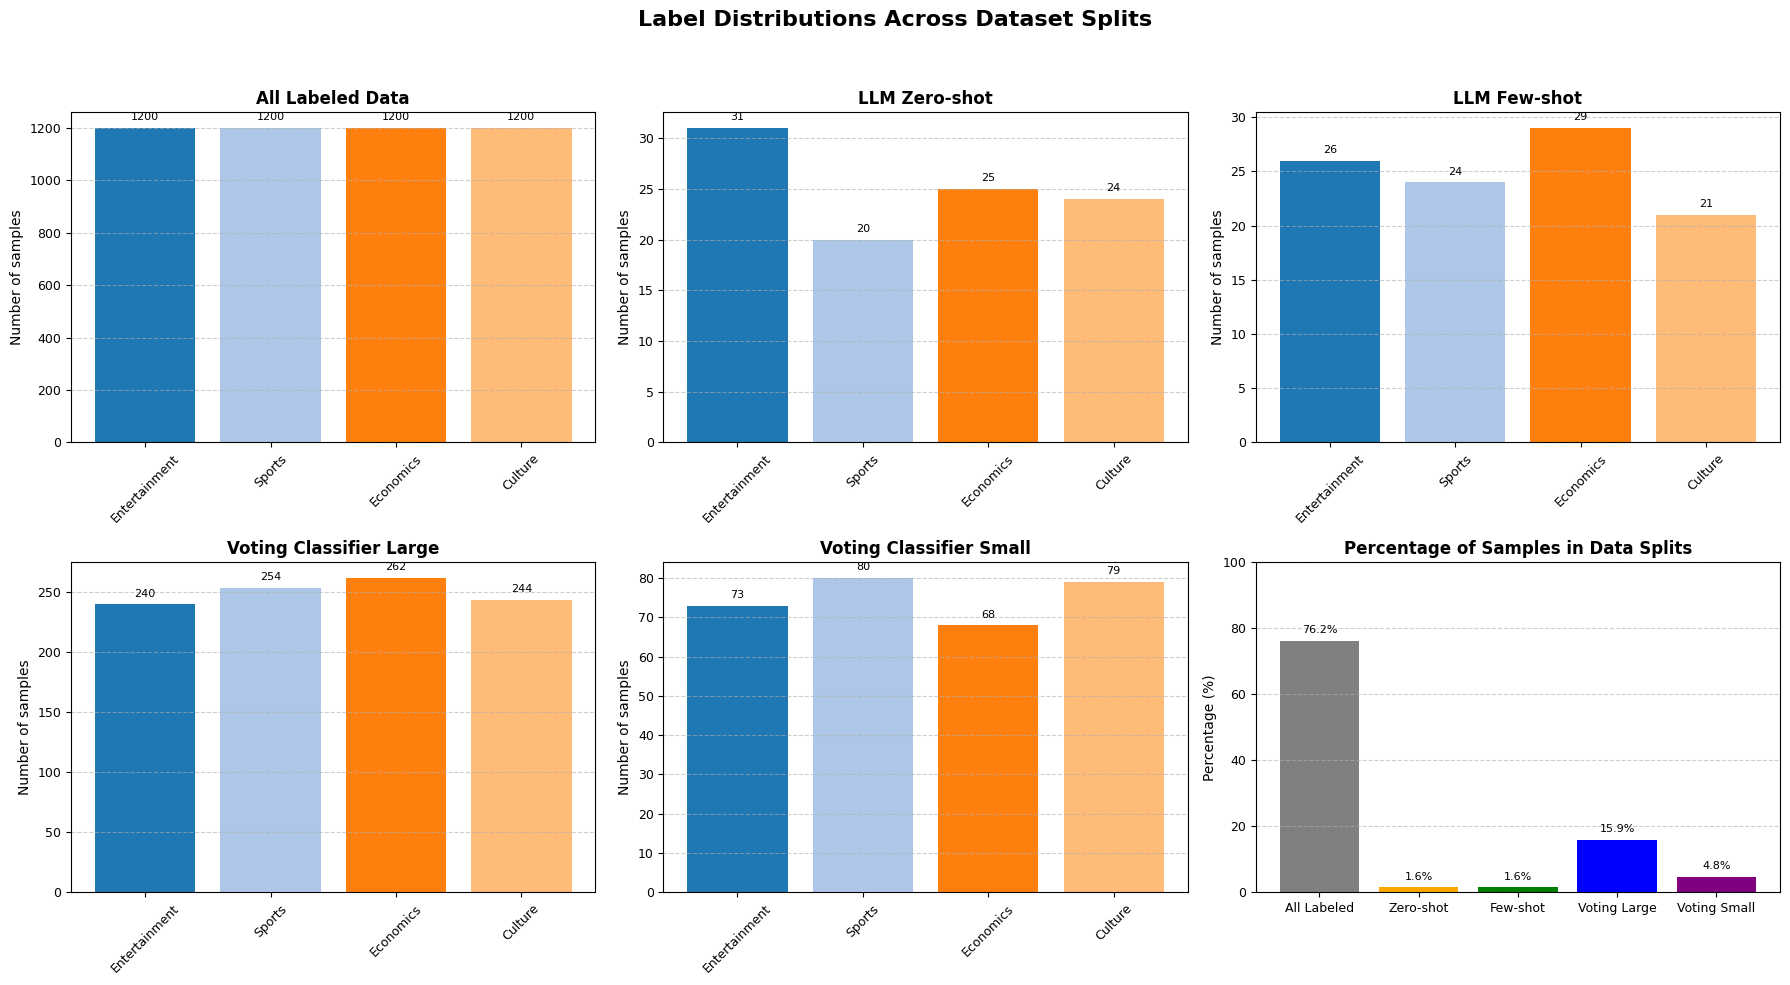

In [15]:

#=========== خواندن فایل های ساخته شده ===========

files = {
    "all_labeled_data": "/content/drive/MyDrive/Final/all_preprocessed.json",
    "llm_zero_shot": "/content/drive/MyDrive/Final/llm_zero_shot.json",
    "llm_few_shot": "/content/drive/MyDrive/Final/llm_few_shot.json",
    "voting_large": "/content/drive/MyDrive/Final/voting_classifier_large.json",
    "voting_small": "/content/drive/MyDrive/Final/voting_classifier_small.json"
}
#=========== ترجمه دسته بندی ها برای خوانایی بیشتر===========

fa_to_en = {
    'تفریح و نشاط': 'Entertainment',
    'ورزشی': 'Sports',
    'اقتصادی': 'Economics',
    'فرهنگ': 'Culture'
}

def load_labels(file_path, label_key="label"):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    labels = []
    for item in data:
        label = item.get(label_key, "")
        if label in fa_to_en:
            labels.append(label)
    return labels

def get_label_distribution(labels):
    dist = {}
    for l in labels:
        dist[l] = dist.get(l, 0) + 1
    return dist

def plot_distribution_ax(ax, dist, title):
    # مرتب‌سازی دسته‌ها بر اساس ترتیب fa_to_en
    categories = [k for k in fa_to_en.keys() if k in dist]
    counts = [dist[c] for c in categories]
    en_labels = [fa_to_en[c] for c in categories]

    bars = ax.bar(en_labels, counts, color=plt.cm.tab20.colors[:len(categories)])
    ax.set_title(title, fontsize=12, weight='bold')
    ax.set_ylabel('Number of samples', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

def plot_data_splits_distribution_ax(ax, *dists):
    labels = ['All Labeled', 'Zero-shot', 'Few-shot', 'Voting Large', 'Voting Small']
    totals = [sum(d.values()) for d in dists]
    total_all = sum(totals)
    percentages = [t / total_all * 100 for t in totals]

    bars = ax.bar(labels, percentages, color=['gray', 'orange', 'green', 'blue', 'purple'])
    ax.set_title('Percentage of Samples in Data Splits', fontsize=12, weight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=10)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for bar, pct in zip(bars, percentages):
        ax.annotate(f'{pct:.1f}%',
                    xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 4), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)

#=========== بارگذاری لیبل‌ها و توزیع‌ها ===========

all_labeled_labels = load_labels(files["all_labeled_data"])
zero_shot_labels = load_labels(files["llm_zero_shot"])
few_shot_labels = load_labels(files["llm_few_shot"])
voting_large_labels = load_labels(files["voting_large"])
voting_small_labels = load_labels(files["voting_small"])

all_labeled_dist = get_label_distribution(all_labeled_labels)
zero_shot_dist = get_label_distribution(zero_shot_labels)
few_shot_dist = get_label_distribution(few_shot_labels)
voting_large_dist = get_label_distribution(voting_large_labels)
voting_small_dist = get_label_distribution(voting_small_labels)

#==========ایجاد شکل و زیرنمودارها (2 ردیف، 3 ستون)==========
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Label Distributions Across Dataset Splits', fontsize=16, weight='bold')
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# ========== نمودارهای ردیف بالا==========
plot_distribution_ax(axs[0,0], all_labeled_dist, 'All Labeled Data')
plot_distribution_ax(axs[0,1], zero_shot_dist, 'LLM Zero-shot')
plot_distribution_ax(axs[0,2], few_shot_dist, 'LLM Few-shot')

#==========نمودارهای ردیف پایین==========
plot_distribution_ax(axs[1,0], voting_large_dist, 'Voting Classifier Large')
plot_distribution_ax(axs[1,1], voting_small_dist, 'Voting Classifier Small')

#========== نمودار درصد نمونه‌ها در داده‌ها==========
plot_data_splits_distribution_ax(axs[1,2], all_labeled_dist, zero_shot_dist, few_shot_dist, voting_large_dist, voting_small_dist)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Train / Test / Validation

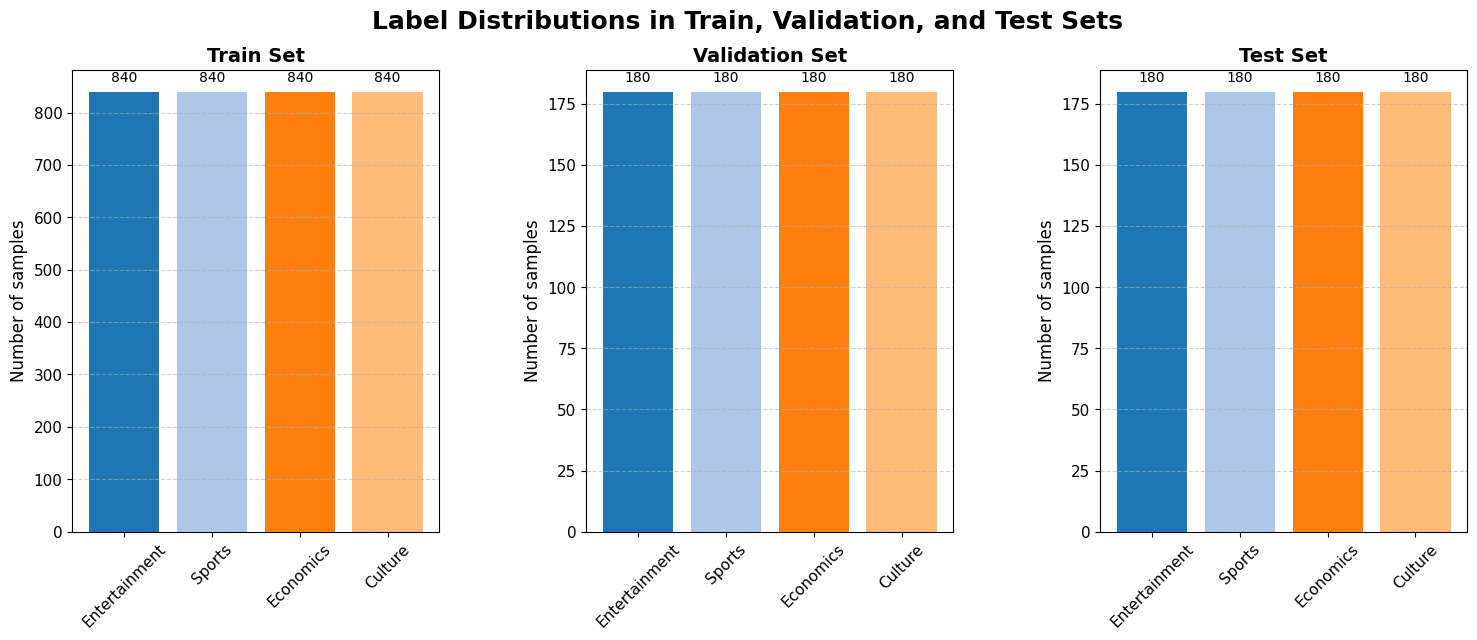

In [16]:
import json
import matplotlib.pyplot as plt

#============ مسیر فایل‌های train, val, test ============
files = {
    "train": "/content/drive/MyDrive/Final/lora_train.json",
    "val": "/content/drive/MyDrive/Final/lora_val.json",
    "test": "/content/drive/MyDrive/Final/lora_test.json"
}

#============ ترجمه دسته‌ها برای نمایش ============
fa_to_en = {
    'تفریح و نشاط': 'Entertainment',
    'ورزشی': 'Sports',
    'اقتصادی': 'Economics',
    'فرهنگ': 'Culture'
}

#============ بارگذاری لیبل‌ها از فایل ============
def load_labels(file_path, label_key="label"):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    labels = []
    for item in data:
        label = item.get(label_key, "")
        if label in fa_to_en:
            labels.append(label)
    return labels

#============ محاسبه توزیع لیبل‌ها ============
def get_label_distribution(labels):
    dist = {}
    for l in labels:
        dist[l] = dist.get(l, 0) + 1
    return dist

#============ رسم نمودار توزیع ============
def plot_distribution_ax(ax, dist, title):
    categories = [k for k in fa_to_en.keys() if k in dist]
    counts = [dist[c] for c in categories]
    en_labels = [fa_to_en[c] for c in categories]

    bars = ax.bar(en_labels, counts, color=plt.cm.tab20.colors[:len(categories)])
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_ylabel('Number of samples', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

#============ بارگذاری لیبل‌ها و محاسبه توزیع ============
train_labels = load_labels(files["train"])
val_labels = load_labels(files["val"])
test_labels = load_labels(files["test"])

train_dist = get_label_distribution(train_labels)
val_dist = get_label_distribution(val_labels)
test_dist = get_label_distribution(test_labels)

#============ ایجاد شکل و subplotها (1 ردیف، 3 ستون) ============
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Label Distributions in Train, Validation, and Test Sets', fontsize=18, weight='bold')
fig.subplots_adjust(wspace=0.4)

plot_distribution_ax(axs[0], train_dist, 'Train Set')
plot_distribution_ax(axs[1], val_dist, 'Validation Set')
plot_distribution_ax(axs[2], test_dist, 'Test Set')

plt.show()